In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("Library")

Library


In [2]:

veri=pd.read_csv('hmelq.csv')
veri.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [4]:


veri=veri.dropna()
veri.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
# Kategorik değişkenler için dummies oluşturalım
dms=pd.get_dummies(veri[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [6]:
n_veri = veri.drop(["reason","job"],axis=1)
n_veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [7]:
veri = pd.concat([n_veri, dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis = 1)
veri.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [8]:
##Bad'lerin sayısı:
veri["bad"].value_counts()



0    1840
1     178
Name: bad, dtype: int64

In [9]:
y=veri["bad"]
X=veri.drop(["bad"],axis=1)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_test)


       loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
205   33700   26395.0   48905.0   6.0    0.0     0.0   48.71   0.0   7.0   
1377  59200   43877.0   74768.0   5.0    0.0     0.0  102.55   0.0  21.0   
1305  22900   41279.0   59993.0   0.0    0.0     0.0  111.24   0.0  17.0   
3134  27000   79218.0  115721.0   9.0    0.0     0.0  280.34   0.0  35.0   
1463  16100   41379.0   57862.0  17.0    0.0     0.0  282.01   0.0  21.0   
...     ...       ...       ...   ...    ...     ...     ...   ...   ...   
1273  16100   72942.0   99544.0   5.0    2.0     0.0   54.95   1.0  20.0   
1668  11500  104610.0  118861.0  18.0    0.0     1.0  203.70   1.0  16.0   
2497   7500   60192.0   76475.0   8.0    0.0     0.0   60.50   2.0  24.0   
835   21500   71636.0   96678.0  13.0    0.0     0.0  135.94   0.0  13.0   
1118   7600   58622.0   77726.0  15.0    0.0     0.0  249.63   2.0  36.0   

      debtinc  reason_DebtCon  reason_HomeImp  job_Mgr  job_Office  job_Other  \
205   

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Sayıları belirli bir aralığa sıkıştırmak ve scale yapma : Standart Scaler kullanılabilir
#Bu işlem data dağılımının ortalamasının 0 ve stardat sapmasının da bir olacak şekilde dönüştürür
#it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [12]:


## Lojistik regresyon yapalım 
import statsmodels.api as sm
loj=sm.Logit(y_train,X_train_std)
loj_model=loj.fit()
loj_model.summary()
# p değerinin alpha'dan küçük olduğu değerler bizim için y yi aciklama da anlam ifade etmektedir.
# Logistic regresyon modeline bakıldığında 
# derog,delinq,clage,ninq,clno ve debtinc'in anlamlı olduğu söylenir

Optimization terminated successfully.
         Current function value: 0.660734
         Iterations 7


/home/basak/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1598
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  -1.229
Time:                        16:30:41   Log-Likelihood:                -1066.4
converged:                       True   LL-Null:                       -478.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0424      0.059     -0.720      0.472      -0.158       0.073
x2            -0.1097      0.114     -0.964      0.335      -0.333       0.113
x3             0.1222      0.114      1.069      0.285      -0.102       0.346
x4            -0.0561      0.055     -1.024      0.306      -0.164       0.051
x5             0.2679      0.075      3.591      0.000       0.122       0.414
x6             0.3964      0.072      5.487      0.000       0.255       0.538
x7            -0.0761      0.056     -1.360      0.174      -0.186       0.034
x8             0.0823      0.055      1.505      0.132      -0.025       0.190
x9            -0.1040      0.059     -1.751      0.080      -0.220       0.012
x10            0.3091      0.063      4.937      0.000       0.186       0.432
x11            0.0060        nan        nan        nan         nan         nan
x12           -0.0060        nan        nan        nan         nan         nan
x13           -0.0049        nan        nan        nan         nan         nan
x14           -0.0280        nan        nan        nan         nan         nan
x15           -0.0148        nan        nan        nan         nan         nan
x16            0.0168        nan        nan        nan         nan         nan
x17            0.0813      0.082      0.990      0.322      -0.080       0.242
x18            0.0080        nan        nan        nan         nan         nan
==============================================================================
"""

In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train_std, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
loj_model.intercept_

array([-2.8134489])

In [16]:
loj_model.coef_

array([[-0.1416886 , -0.1570136 ,  0.24778784, -0.12530585,  0.31141047,
         0.60236914, -0.37618738,  0.20030975, -0.26512293,  0.81734214,
         0.03541072, -0.03541072,  0.02424981, -0.12616746, -0.00594696,
         0.02435276,  0.17809789,  0.04920444]])

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 366 and 10 are actual predictions, and 1 and 27 are incorrect predictions. 
366 tane 0 doğru tahmin ???, 27 tane yanlış tahmin, 1 tane yanlış tahmin.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

In [17]:
loj_model.predict(X_test_std)[0:10]
# X verileri ile tahmin etme 




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
loj_model.predict_proba(X_test_std)[0:10]
# 0 olma ve 1 olma ihtimallerini(olasılıgını) veriyor
#sağ 1 olma ihtimali sol 0 olma ihtimalidir. aşağıdakiler 0,50 trashholdu içindir. trashold değiştirilebilir bu arada

array([[0.96801605, 0.03198395],
       [0.90499706, 0.09500294],
       [0.94207422, 0.05792578],
       [0.89357021, 0.10642979],
       [0.91804685, 0.08195315],
       [0.92836977, 0.07163023],
       [0.97522121, 0.02477879],
       [0.97697295, 0.02302705],
       [0.96419462, 0.03580538],
       [0.87660808, 0.12339192]])

In [30]:
# gerçek y değerlerim;
y_test[0:10]


299     0
833     0
397     0
1333    0
2361    0
1595    0
1012    0
229     0
579     0
1431    0
Name: bad, dtype: int64

In [31]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X_test_std)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları



array([0.03198395, 0.09500294, 0.05792578, 0.10642979, 0.08195315,
       0.07163023, 0.02477879, 0.02302705, 0.03580538, 0.12339192])

In [32]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[366,   1],
       [ 27,  10]])

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9306930693069307
Precision: 0.9090909090909091
Recall: 0.2702702702702703


In [35]:
#prediction = loj.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       367
           1       0.91      0.27      0.42        37

    accuracy                           0.93       404
   macro avg       0.92      0.63      0.69       404
weighted avg       0.93      0.93      0.91       404



In [21]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.7 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[367,   0],
       [ 31,   6]])

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9232673267326733
Precision: 1.0
Recall: 0.16216216216216217


In [24]:
#prediction = loj.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       367
           1       1.00      0.16      0.28        37

    accuracy                           0.92       404
   macro avg       0.96      0.58      0.62       404
weighted avg       0.93      0.92      0.90       404



In [25]:
loj_model.predict_proba(X_test_std)[:,1][0:5]

array([0.03198395, 0.09500294, 0.05792578, 0.10642979, 0.08195315])

In [26]:
#roc curve ün 1e yakın olmasını bekliyoruz modelin doğruluğunu test ediyoruz bunlar ne kadar fit ediyor
import numpy as np
import os
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve


logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test_std))
logit_roc_auc

0.6337727373149716

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test_std)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.         0.         0.         0.0027248  0.0027248  0.00544959
 0.00544959 0.00817439 0.00817439 0.02452316]
tpr:  [0.         0.02702703 0.16216216 0.16216216 0.27027027 0.27027027
 0.2972973  0.2972973  0.35135135 0.35135135]
thresholds:  [1.99986966 0.99986966 0.78219241 0.66080357 0.52446951 0.42397899
 0.40521352 0.36146102 0.33820806 0.2897076 ]


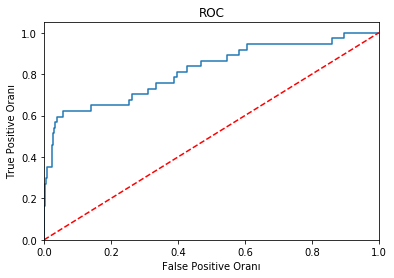

In [28]:
### en baştan curve eden ve sonra converge eden bir eğri bekliyorum ki grafiğin altında kalan 1e daha yakın olsun
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
